In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')


In [62]:
ipl = pd.read_csv("../Datasets/ipl_2022_dataset.csv")
print(ipl)

     Unnamed: 0                  Player  Base Price         TYPE  \
0             0             Rashid Khan  Draft Pick       BOWLER   
1             1           Hardik Pandya  Draft Pick  ALL-ROUNDER   
2             2         Lockie Ferguson        2 Cr       BOWLER   
3             3           Rahul Tewatia     40 Lakh  ALL-ROUNDER   
4             4            Shubman Gill  Draft Pick       BATTER   
..          ...                     ...         ...          ...   
628         628            Sairaj Patil     20 Lakh       BATTER   
629         629              Monu Singh     20 Lakh       BOWLER   
630         630  Nivethan Radhakrishnan     20 Lakh       BOWLER   
631         631            Lance Morris     20 Lakh       BOWLER   
632         632            Aaron Hardie     20 Lakh  ALL-ROUNDER   

     COST IN ₹ (CR.)  Cost IN $ (000) 2021 Squad            Team  
0               15.0           1950.0        SRH  Gujarat Titans  
1               15.0           1950.0         MI 

In [63]:
ipl.shape
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [64]:
ipl.shape

(633, 8)

In [65]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [66]:
ipl.columns   #ipl.columns will give you the name of the columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [67]:
ipl.drop('Unnamed: 0',axis=1,inplace=True)   

In [68]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.7+ KB


Now the unwanted columns is being removed Unnamed : 0 and now further we process to data analysis.

In [69]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [70]:
ipl.isnull().sum()  #what is done is that isnull() function will check whether there is null values or not and sum will give the sum of values like in below output like player columns has 0 null values , 2021 squad has 434 null values 

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

  Yes, you can replace the NaN values in a column with 0 (or any other placeholder) while preserving other data in the column. This can be done using the fillna() method in pandas. Because some columns data are needed as some contains useful values otherwise of that columns had not any value remove it by using drop() functions.

In [71]:
ipl.describe

<bound method NDFrame.describe of                      Player  Base Price         TYPE  COST IN ₹ (CR.)  \
0               Rashid Khan  Draft Pick       BOWLER             15.0   
1             Hardik Pandya  Draft Pick  ALL-ROUNDER             15.0   
2           Lockie Ferguson        2 Cr       BOWLER             10.0   
3             Rahul Tewatia     40 Lakh  ALL-ROUNDER              9.0   
4              Shubman Gill  Draft Pick       BATTER              8.0   
..                      ...         ...          ...              ...   
628            Sairaj Patil     20 Lakh       BATTER              NaN   
629              Monu Singh     20 Lakh       BOWLER              NaN   
630  Nivethan Radhakrishnan     20 Lakh       BOWLER              NaN   
631            Lance Morris     20 Lakh       BOWLER              NaN   
632            Aaron Hardie     20 Lakh  ALL-ROUNDER              NaN   

     Cost IN $ (000) 2021 Squad            Team  
0             1950.0        SRH  Gujara

In [72]:
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['COST IN ₹ (CR.)'].fillna(0)

In [73]:
#we will check the player who has remain unsold in the 2021 auction that has the null value in squad column.

In [74]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,3.2,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,2.6,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,2.4,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,2.4,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,0.5,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


these above shows these player were unsold

In [75]:
ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [76]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [77]:
teams = ipl[ipl['COST IN ₹ (CR.)'] > 0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [78]:
ipl['status'] = ipl['Team'].replace(teams,'sold')

#here team and status has been added here as above we had a status and team new columns where we had teams will be assign with team name where COST in cr. value will be greater than 0.

In [79]:
ipl.head() 

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,15.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,15.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,10.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,9.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,8.0,KKR,Gujarat Titans,sold


In [80]:
ipl[ipl['Player'].duplicated(keep =False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,0.65,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.00,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.00,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.00,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.00,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.00,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.00,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.00,Not Participated,Unsold,Unsold


In [81]:
#how many player participated in 2022 IPL auction?
ipl.shape[0]

633

#Now lets see how many player had participated by looking the types 

In [82]:
#how many type of player have participated?
types = ipl['TYPE'].value_counts()
types.reset_index()

,TYPE,count
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


##how you create a piechart 

[]

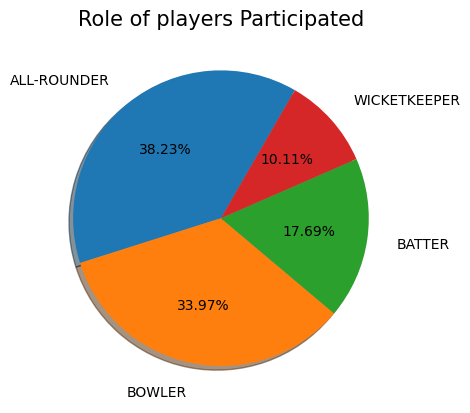

In [83]:
plt.pie(types.values,labels=types.index,labeldistance=1.2,autopct='%1.2f%%',shadow=True,startangle=60)
plt.title('Role of players Participated',fontsize=15)
plt.plot()

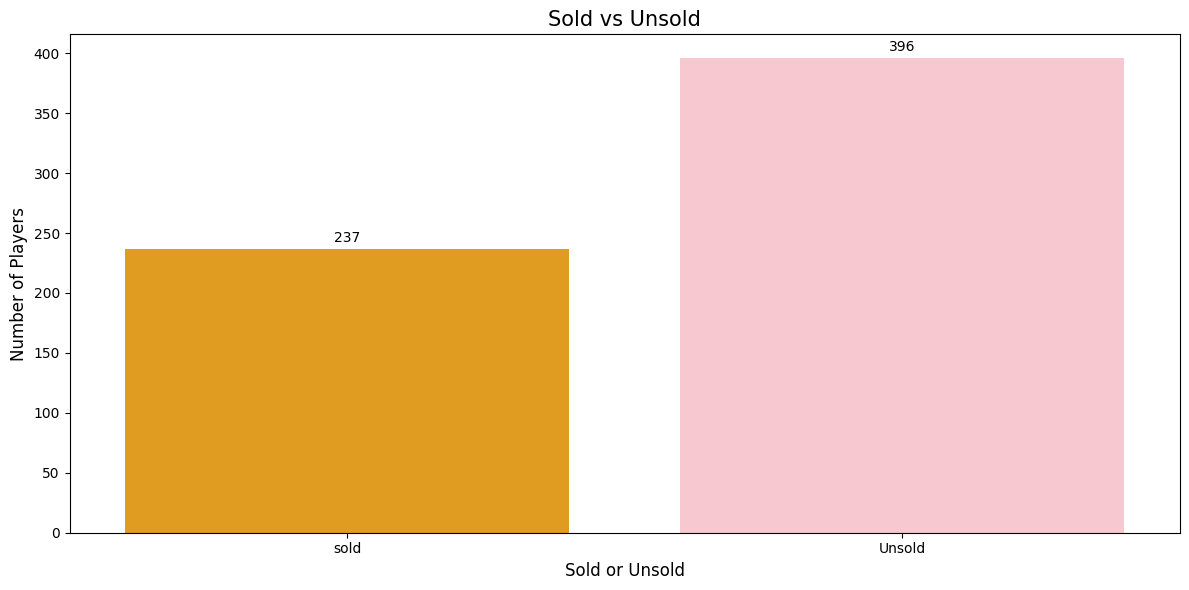

In [89]:
plt.figure(figsize=(12, 6))  # Increased figure size
fig = sns.countplot(x=ipl['status'], palette=['Orange', 'Pink'])

plt.xlabel('Sold or Unsold', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.title('Sold vs Unsold', fontsize=15)

# Rotate X-axis labels if necessary
plt.xticks(rotation=0)

# Annotate bar heights
for p in fig.patches:
    fig.annotate(
        format(p.get_height(), '.0f'),  # Format the height of the bar
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
        ha='center', va='center',  # Alignment
        xytext=(0, 8), textcoords='offset points'  # Offset
    )

plt.tight_layout()  # Prevent overlapping
plt.show()

In [90]:
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

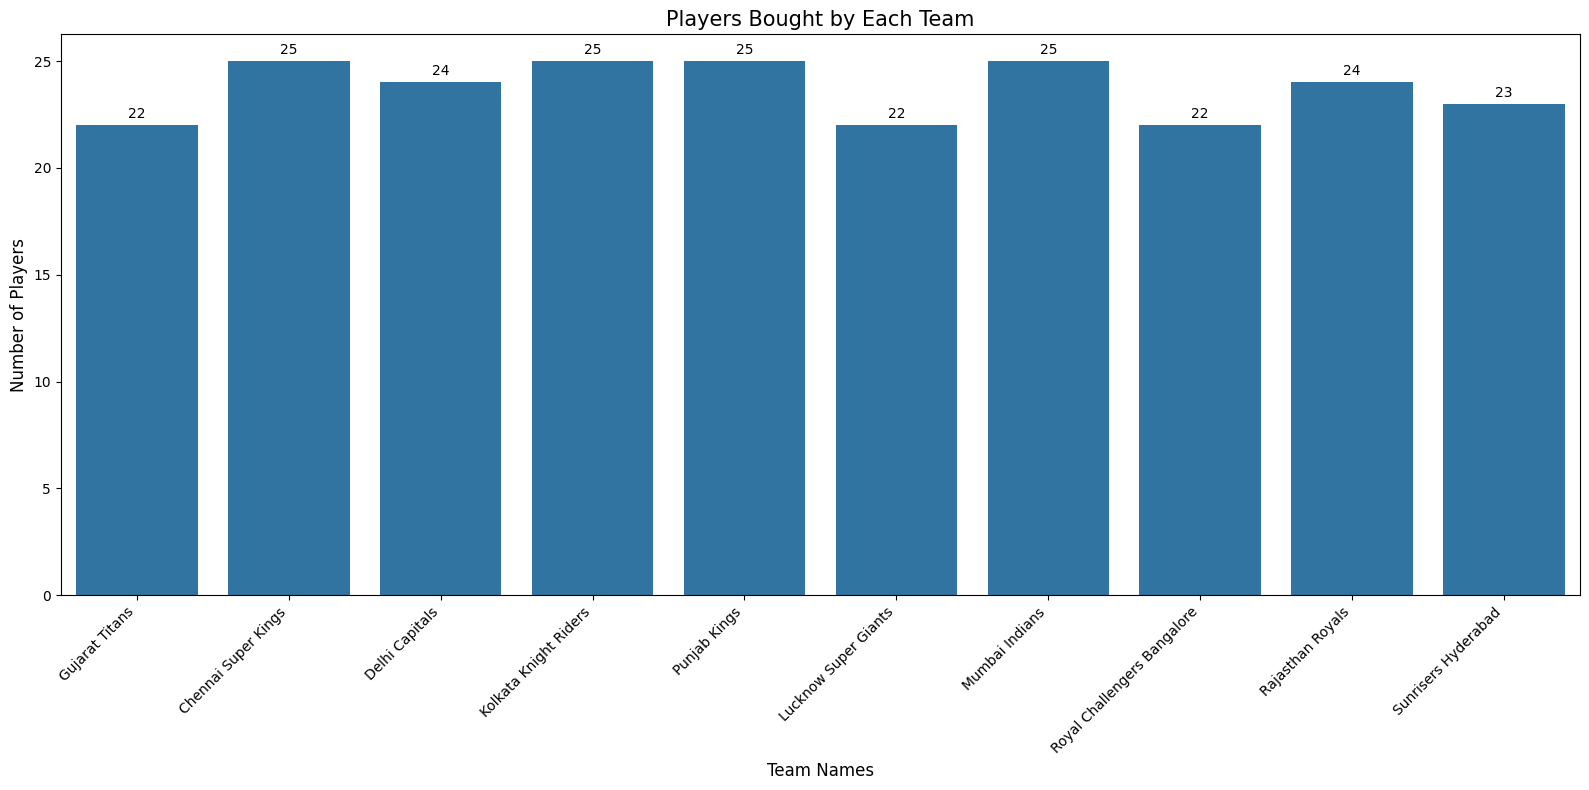

In [96]:
#total number of player bought by each team.
# Adjust the figure size
plt.figure(figsize=(16, 8))  # Increased width for clarity
fig = sns.countplot(x=ipl[ipl['Team'] != 'Unsold']['Team'])

# Customize the labels and title
plt.xlabel('Team Names', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.title('Players Bought by Each Team', fontsize=15)

# Rotate X-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align to the right

# Annotate bar heights
for p in fig.patches:
    fig.annotate(
        format(p.get_height(), '.0f'),  # Format the height of the bar
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
        ha='center', va='center',  # Alignment
        xytext=(0, 8), textcoords='offset points'  # Offset
    )

plt.tight_layout()  # Ensure elements fit well within the plot
plt.show()

In [97]:
ipl['retention'] = ipl['Base Price']

In [100]:
ipl['retention'].replace(
    ['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', 
     '50 Lakh', '30 Lakh', '1.5 Cr'], 
    'From Auction', 
    inplace=True
)


In [102]:
#treating base price:

ipl['Base Price'].replace('Draft Pick',0,inplace = True)

In [103]:
#Treating Base Price
ipl['Base Price'].replace('Draft Pick',0,inplace=True)

In [107]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x : str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x : str(x).split(' ')[0])


In [108]:
ipl['Base Price'].replace('Retained',0,inplace=True)

In [109]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,15.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,15.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,10.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,9.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,8.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [110]:
#total players retained and bought
ipl.groupby(['Team','retention']) ['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

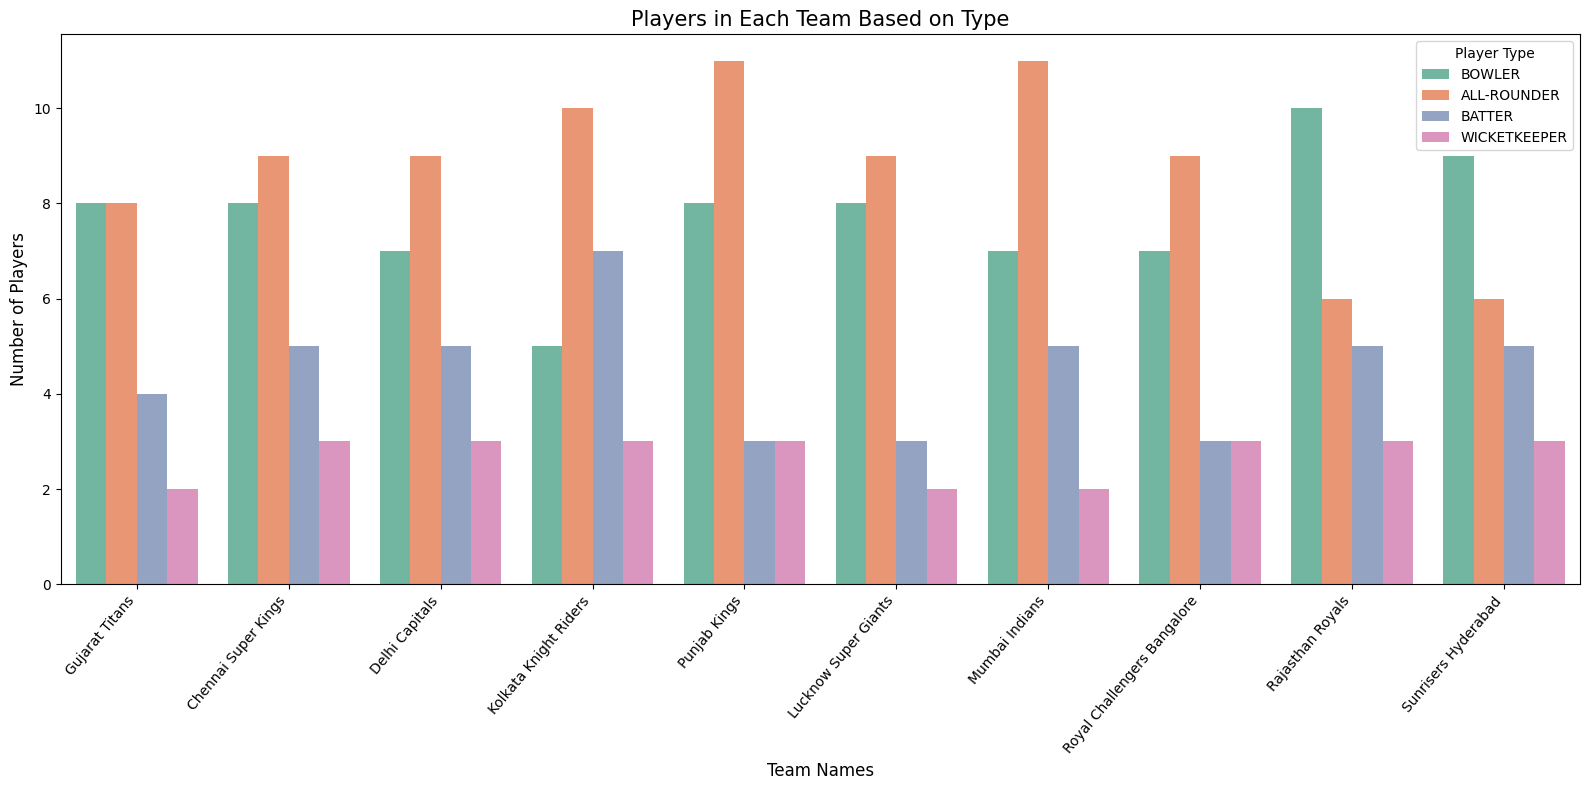

In [113]:
plt.figure(figsize=(16, 8))  # Increase figure size for better clarity

# Create a countplot grouped by 'TYPE'
fig = sns.countplot(
    x=ipl[ipl['Team'] != 'Unsold']['Team'],  # Exclude 'Unsold' players
    hue=ipl[ipl['Team'] != 'Unsold']['TYPE'],  # Group by 'TYPE'
    palette='Set2'  # Optional: Add a color palette
)

# Add labels and title
plt.title('Players in Each Team Based on Type', fontsize=15)
plt.xlabel('Team Names', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)

# Rotate and align X-axis labels
plt.xticks(rotation=50, ha='right')  # Rotate labels 50 degrees, align to the right

# Adjust layout to prevent overlaps
plt.tight_layout()

# Display legend
plt.legend(title='Player Type', loc='upper right')

plt.show()

This code creates a bar plot to visualize the distribution of players across different teams based on their types, such as batsman, bowler, etc. The figure size is set to (16, 8) to ensure the graph is large enough for clear visualization, especially when dealing with many teams or player categories. The sns.countplot function generates the bar chart. It filters out players whose team is labeled as 'Unsold' and plots the count of players for each remaining team on the X-axis. The hue parameter groups the bars by the player type (TYPE), so each bar cluster represents a team, and each color within a cluster corresponds to a specific player type. The Set2 color palette is applied to make the visualization more visually appealing.

The plot is then customized with a title, labeled X and Y axes, and rotated X-axis labels at a 50-degree angle to avoid overlap and improve readability, particularly for longer team names. The plt.tight_layout() function ensures that all elements of the graph fit neatly within the figure area without overlapping. Finally, a legend is added to the top right corner of the plot, explaining the colors representing different player types. This makes the graph easy to interpret and provides a clear overview of the player distribution by team and type.

In [118]:
#highest amount spent on single player by each team
ipl[ipl['retention'] == 'From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

This give the overview of how much for a single player is being given amount

In [121]:
#Player retained at maximum price
ipl[ipl['retention']== 'Retained'].sort_values(by = 'COST IN ₹ (CR.)',ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,0,ALL-ROUNDER,16.0,16.0,CSK,Chennai Super Kings,sold,Retained,0,0


In [123]:
#top 5 bowlers:based on cost and INR

ipl[(ipl['retention']== 'From Auction') & (ipl['TYPE'] == 'BOWLER')].sort_values(by = 'COST IN ₹ (CR.)',ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,14.00,CSK,Chennai Super Kings,sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,10.75,CSK,Delhi Capitals,sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,10.00,KKR,Rajasthan Royals,sold,From Auction,Cr,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,10.00,KKR,Gujarat Titans,sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,10.00,DC,Lucknow Super Giants,sold,From Auction,Lakh,20


In [124]:
#top 5 batters:based on cost and INR

ipl[(ipl['retention']== 'From Auction') & (ipl['TYPE'] == 'BATTER')].sort_values(by = 'COST IN ₹ (CR.)',ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,12.25,DC,Kolkata Knight Riders,sold,From Auction,Cr,2
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,8.50,DC,Rajasthan Royals,sold,From Auction,Cr,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.50,8.50,KKR,Sunrisers Hyderabad,sold,From Auction,Lakh,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,8.25,DC,Punjab Kings,sold,From Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,7.75,RCB,Rajasthan Royals,sold,From Auction,Cr,2


In [126]:
#top 5 ALLROUNDER:based on cost and INR

ipl[(ipl['retention']== 'From Auction') & (ipl['TYPE'] == 'ALL-ROUNDER')].sort_values(by = 'COST IN ₹ (CR.)',ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,11.50,RR,Punjab Kings,sold,From Auction,Cr,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,10.75,RCB,Royal Challengers Bangalore,sold,From Auction,Cr,1
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,10.75,RCB,Royal Challengers Bangalore,sold,From Auction,Cr,2
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,9.00,PBKS,Punjab Kings,sold,From Auction,Lakh,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,9.00,RR,Gujarat Titans,sold,From Auction,Lakh,40


In [129]:
ipl = ipl.rename(columns={'2021 Squad':'Prev_team'})

In [130]:
unsold_players = ipl[(ipl.Prev_team != 'Not Participated')
                     & (ipl.Team == 'Unsold')][['Player','Prev_team']]


In [131]:
print(unsold_players)

                      Player Prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr

In [136]:
unsold_players.value_counts()

Player                   Prev_team
Adam Zampa               RCB          1
Adil Rashid              PBKS         1
M. Siddharth             DC           1
Mohammed Azharuddeen     RCB          1
Moises Henriques         PBKS         1
Mujeeb Zadran            SRH          1
Pawan Negi               KKR          1
Piyush Chawla            MI           1
Rajat Patidar            RCB          1
Sachin Baby              RCB          1
Sandeep Warrier          KKR          1
Saurabh Tiwary           MI           1
Scott Kuggeleijn         RCB          1
Shakib Al Hasan          KKR          1
Shreevats Goswami        SRH          1
Steve Smith              DC           1
Suresh Raina             CSK          1
Tabraiz Shamsi           RR           1
Virat Singh              SRH          1
Lukman Hussain Meriwala  DC           1
Kulwant Khejroliya       DC           1
Kedar Jadhav             SRH          1
Cheteshwar Pujara        CSK          1
Aditya Tare              MI           1
Agniv